#1. Mount Drive

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
!ls -al '/gdrive/My Drive/data'

total 2193336
-rw------- 1 root root    337847 Feb  2 11:56 data_202001.csv
-rw------- 1 root root    314682 Feb  2 10:30 data_202002.csv
-rw------- 1 root root    335953 Feb  2 10:35 data_202003.csv
-rw------- 1 root root    988308 Feb  2 11:58 data_2020.csv
-rw------- 1 root root   9453240 Aug  7  2019 marathon_2015_2017.csv
-rw------- 1 root root   4228123 Apr 29  2017 marathon_results_2015.csv
-rw------- 1 root root   4244383 Apr 29  2017 marathon_results_2016.csv
-rw------- 1 root root   4196246 Apr 29  2017 marathon_results_2017.csv
-rw------- 1 root root 783889122 Jan 30 17:16 TCS_영업소간통행시간_1시간_1개월_202001
-rw------- 1 root root 699429059 Jan 31 06:59 TCS_영업소간통행시간_1시간_1개월_202002
-rw------- 1 root root 738556069 Jan 31 06:59 TCS_영업소간통행시간_1시간_1개월_202003


#2. Korean Characters

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 15 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 3s (2,919 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 146442 files and d

런타임 - 런타임 다시 시작

matplotlib의 폰트를 Nanum 폰트로 지정

In [ ]:
# Import pyplot as a alias 'plt'
import matplotlib.pyplot as plt

In [ ]:
# Import seaborn as a alias 'sns'
import seaborn as sns
sns.set()

In [ ]:
plt.rc('font', family='NanumBarunGothic') 

#3. Load Data

In [ ]:
import pandas as pd

In [ ]:
# Load a file under "data" folder
file = "/gdrive/My Drive/data/data_2020.csv"
data = pd.read_csv(file)

In [ ]:
data.tail()

,집계일자,집계시,출발영업소코드,도착영업소코드,통행시간,요일
37351,20200331,10,101,105,885,1
37352,20200331,8,101,140,13403,1
37353,20200331,3,101,125,7074,1
37354,20200331,10,101,110,3598,1
37355,20200331,4,101,105,637,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37356 entries, 0 to 37355
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   집계일자     37356 non-null  int64
 1   집계시      37356 non-null  int64
 2   출발영업소코드  37356 non-null  int64
 3   도착영업소코드  37356 non-null  int64
 4   통행시간     37356 non-null  int64
 5   요일       37356 non-null  int64
dtypes: int64(6)
memory usage: 1.7 MB


#4. 집계일자

In [ ]:
data_06_22 = data[data['집계시'].isin(range(6,23))]

In [ ]:
data_06_22

,집계일자,집계시,출발영업소코드,도착영업소코드,통행시간,요일
10,20200101,10,101,105,686,2
11,20200101,10,101,105,761,2
12,20200101,10,101,105,704,2
13,20200101,10,101,105,807,2
14,20200101,10,101,105,687,2
...,...,...,...,...,...,...
37348,20200331,6,101,115,6938,1
37349,20200331,17,101,135,12477,1
37351,20200331,10,101,105,885,1
37352,20200331,8,101,140,13403,1


In [ ]:
data_06_22.sort_values(by='집계시')

,집계일자,집계시,출발영업소코드,도착영업소코드,통행시간,요일
25164,20200302,6,101,110,2772,0
22064,20200213,6,101,130,8044,3
12199,20200130,6,101,115,6542,3
6518,20200117,6,101,105,806,4
28006,20200309,6,101,115,7670,0
...,...,...,...,...,...,...
15006,20200207,22,101,105,991,4
16139,20200209,22,101,130,9075,6
28346,20200310,22,101,115,4747,1
16141,20200209,22,101,130,7947,6


In [ ]:
data_06_22_day = data_06_22.groupby('집계일자')['도착영업소코드'].value_counts()

In [ ]:
data_06_22_day

집계일자      도착영업소코드
20200101  105        96
          110        65
          115        51
          135        19
          140        19
                     ..
20200331  140        16
          135        15
          120        14
          130        13
          125         9
Name: 도착영업소코드, Length: 727, dtype: int64

In [ ]:
data_06_22_day = data_06_22.groupby('집계일자')['도착영업소코드'].value_counts().unstack(level=0)

In [ ]:
data_06_22_day

집계일자,20200101,20200102,20200103,20200104,20200105,20200106,20200107,20200108,20200109,20200110,20200111,20200112,20200113,20200114,20200115,20200116,20200117,20200118,20200119,20200120,20200121,20200122,20200123,20200124,20200125,20200126,20200127,20200128,20200129,20200130,20200131,20200201,20200202,20200203,20200204,20200205,20200206,20200207,20200208,20200209,...,20200221,20200222,20200223,20200224,20200225,20200226,20200227,20200228,20200229,20200301,20200302,20200303,20200304,20200305,20200306,20200307,20200308,20200309,20200310,20200311,20200312,20200313,20200314,20200315,20200316,20200317,20200318,20200319,20200320,20200321,20200322,20200323,20200324,20200325,20200326,20200327,20200328,20200329,20200330,20200331
도착영업소코드,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
105,96.0,102.0,98.0,90.0,77.0,96.0,94.0,102.0,102.0,96.0,89.0,93.0,102.0,102.0,94.0,102.0,96.0,96.0,95.0,102.0,102.0,99.0,83.0,78.0,73.0,78.0,83.0,90.0,102.0,102.0,100.0,86.0,88.0,102.0,102.0,102.0,102.0,102.0,93.0,88.0,...,102.0,92.0,79.0,102.0,100.0,100.0,102.0,100.0,96.0,88.0,102.0,102.0,98.0,102.0,102.0,96.0,92.0,102.0,93.0,102.0,102.0,102.0,93.0,97.0,102.0,102.0,102.0,95.0,102.0,101.0,87.0,102.0,102.0,102.0,102.0,100.0,96.0,93.0,102.0,100.0
110,65.0,93.0,85.0,76.0,60.0,81.0,86.0,86.0,92.0,82.0,76.0,68.0,91.0,80.0,87.0,94.0,86.0,71.0,69.0,96.0,77.0,87.0,61.0,39.0,46.0,50.0,57.0,81.0,80.0,93.0,74.0,57.0,66.0,83.0,81.0,92.0,94.0,77.0,59.0,64.0,...,79.0,68.0,64.0,87.0,93.0,84.0,85.0,84.0,66.0,60.0,100.0,85.0,89.0,90.0,76.0,73.0,71.0,85.0,98.0,88.0,87.0,80.0,64.0,69.0,90.0,86.0,90.0,96.0,83.0,69.0,50.0,86.0,89.0,82.0,81.0,83.0,68.0,68.0,91.0,94.0
115,51.0,52.0,64.0,52.0,49.0,56.0,53.0,53.0,63.0,52.0,52.0,52.0,58.0,54.0,49.0,49.0,56.0,52.0,45.0,53.0,53.0,48.0,48.0,52.0,50.0,49.0,50.0,51.0,54.0,58.0,68.0,51.0,49.0,54.0,49.0,61.0,53.0,54.0,54.0,51.0,...,56.0,53.0,41.0,53.0,46.0,48.0,50.0,46.0,54.0,50.0,48.0,52.0,58.0,57.0,57.0,53.0,51.0,53.0,47.0,55.0,52.0,51.0,47.0,52.0,59.0,67.0,58.0,49.0,52.0,63.0,50.0,62.0,53.0,52.0,53.0,51.0,52.0,50.0,56.0,56.0
120,15.0,15.0,16.0,15.0,14.0,12.0,10.0,15.0,14.0,17.0,29.0,17.0,11.0,9.0,14.0,12.0,18.0,15.0,20.0,18.0,13.0,16.0,14.0,18.0,17.0,12.0,11.0,17.0,12.0,17.0,13.0,18.0,14.0,17.0,14.0,17.0,16.0,17.0,18.0,14.0,...,14.0,14.0,9.0,17.0,10.0,12.0,14.0,12.0,16.0,9.0,17.0,14.0,10.0,10.0,16.0,17.0,12.0,18.0,9.0,18.0,18.0,17.0,18.0,14.0,15.0,10.0,16.0,14.0,16.0,16.0,17.0,16.0,17.0,16.0,13.0,13.0,18.0,17.0,14.0,14.0
125,17.0,15.0,15.0,14.0,26.0,14.0,16.0,18.0,17.0,15.0,16.0,14.0,23.0,17.0,15.0,17.0,17.0,15.0,11.0,16.0,14.0,13.0,17.0,17.0,17.0,11.0,14.0,21.0,13.0,13.0,15.0,17.0,12.0,16.0,17.0,16.0,13.0,17.0,14.0,18.0,...,16.0,11.0,14.0,17.0,13.0,10.0,17.0,13.0,16.0,12.0,18.0,11.0,17.0,11.0,15.0,17.0,16.0,17.0,13.0,16.0,17.0,15.0,12.0,9.0,17.0,17.0,17.0,17.0,15.0,17.0,10.0,17.0,10.0,16.0,16.0,18.0,10.0,16.0,17.0,9.0
130,18.0,18.0,23.0,15.0,22.0,25.0,17.0,18.0,20.0,28.0,13.0,20.0,19.0,18.0,16.0,18.0,25.0,13.0,25.0,20.0,14.0,17.0,22.0,21.0,19.0,15.0,24.0,23.0,14.0,14.0,26.0,14.0,20.0,25.0,14.0,15.0,15.0,21.0,17.0,24.0,...,12.0,12.0,24.0,19.0,14.0,14.0,12.0,17.0,15.0,25.0,19.0,15.0,11.0,18.0,10.0,14.0,18.0,17.0,17.0,18.0,15.0,17.0,13.0,20.0,33.0,15.0,17.0,16.0,13.0,13.0,17.0,20.0,17.0,14.0,15.0,14.0,21.0,21.0,21.0,13.0
135,19.0,22.0,17.0,25.0,14.0,18.0,16.0,15.0,19.0,17.0,18.0,19.0,17.0,17.0,10.0,15.0,15.0,17.0,18.0,18.0,14.0,17.0,24.0,26.0,18.0,17.0,13.0,17.0,13.0,14.0,15.0,17.0,13.0,16.0,15.0,13.0,13.0,12.0,18.0,12.0,...,15.0,18.0,13.0,17.0,9.0,11.0,12.0,14.0,15.0,11.0,16.0,11.0,16.0,17.0,13.0,13.0,17.0,14.0,16.0,10.0,18.0,12.0,17.0,11.0,13.0,14.0,16.0,17.0,14.0,17.0,15.0,15.0,12.0,17.0,15.0,15.0,17.0,16.0,12.0,15.0
140,19.0,15.0,26.0,17.0,18.0,18.0,17.0,20.0,18.0,18.0,17.0,15.0,17.0,23.0,17.0,13.0,24.0,18.0,17.0,17.0,17.0,23.0,20.0,24.0,21.0,16.0,21.0,14.0,17.0,18.0,17.0,17.0,19.0,18.0,18.0,12.0,18.0,29.0,27.0,17.0,...,23.0,21.0,18.0,20.0,17.0,18.0,31.0,15.0,14.0,24.0,24.0,17.0,18.0,18.0,18.0,17.0,22

In [ ]:
data_06_22_day = data_06_22.groupby('집계일자')['도착영업소코드'].value_counts().unstack().fillna(0)

In [ ]:
data_06_22_day

도착영업소코드,105,110,115,120,125,130,135,140
집계일자,,,,,,,,
20200101,96.0,65.0,51.0,15.0,17.0,18.0,19.0,19.0
20200102,102.0,93.0,52.0,15.0,15.0,18.0,22.0,15.0
20200103,98.0,85.0,64.0,16.0,15.0,23.0,17.0,26.0
20200104,90.0,76.0,52.0,15.0,14.0,15.0,25.0,17.0
20200105,77.0,60.0,49.0,14.0,26.0,22.0,14.0,18.0
...,...,...,...,...,...,...,...,...
20200327,100.0,83.0,51.0,13.0,18.0,14.0,15.0,16.0
20200328,96.0,68.0,52.0,18.0,10.0,21.0,17.0,17.0
20200329,93.0,68.0,50.0,17.0,16.0,21.0,16.0,17.0


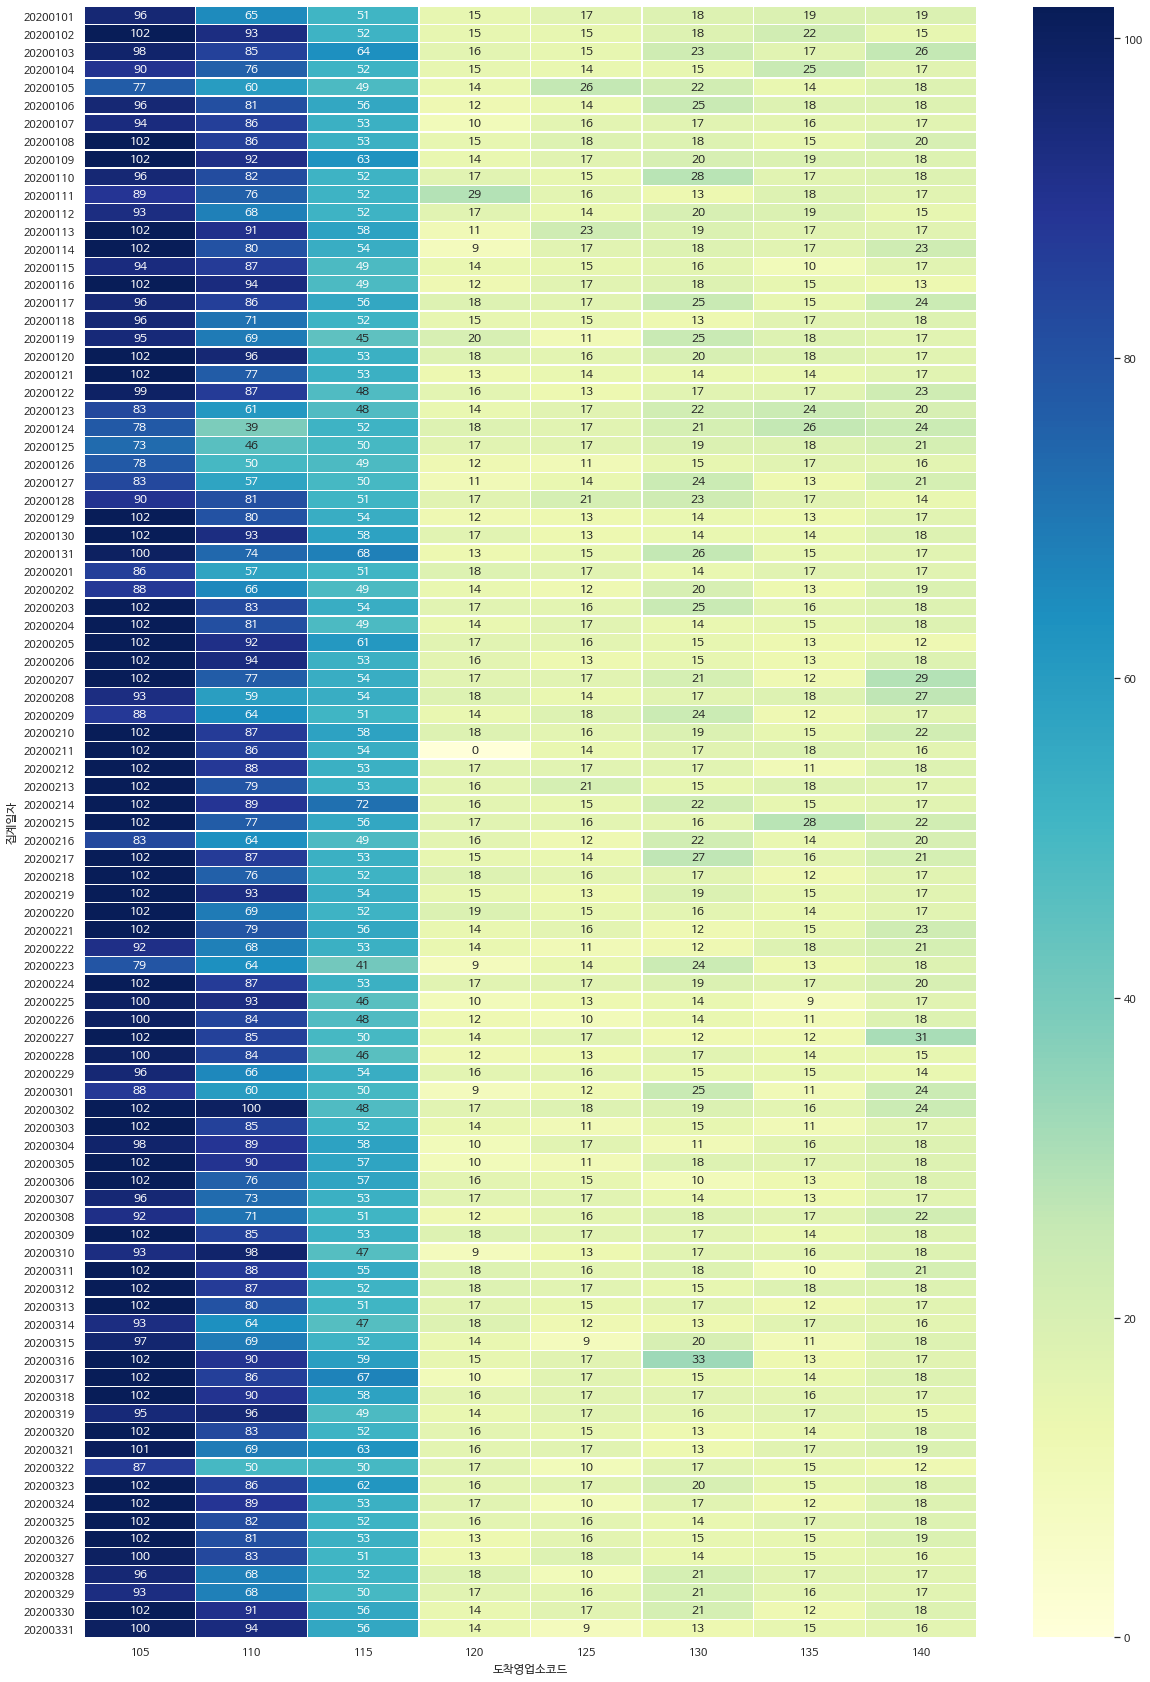

In [ ]:
# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(20, 30))
sns.heatmap(data_06_22_day,annot=True, fmt=".0f", linewidths=.5, ax=ax, cmap="YlGnBu")

#5. 집계시

In [ ]:
data_06_22_time = data_06_22.groupby('집계시')['도착영업소코드'].value_counts().unstack().fillna(0)

In [ ]:
data_06_22_time

도착영업소코드,105,110,115,120,125,130,135,140
집계시,,,,,,,,
6,532,403,250,42,42,46,45,80
7,532,443,306,65,56,55,46,82
8,532,474,284,78,65,82,60,87
9,528,466,283,91,77,94,75,89
10,529,458,292,94,79,99,81,93
11,529,460,289,93,85,108,86,94
12,526,460,292,94,87,108,91,100
13,525,448,288,96,93,113,91,100
14,523,454,290,96,95,113,94,101


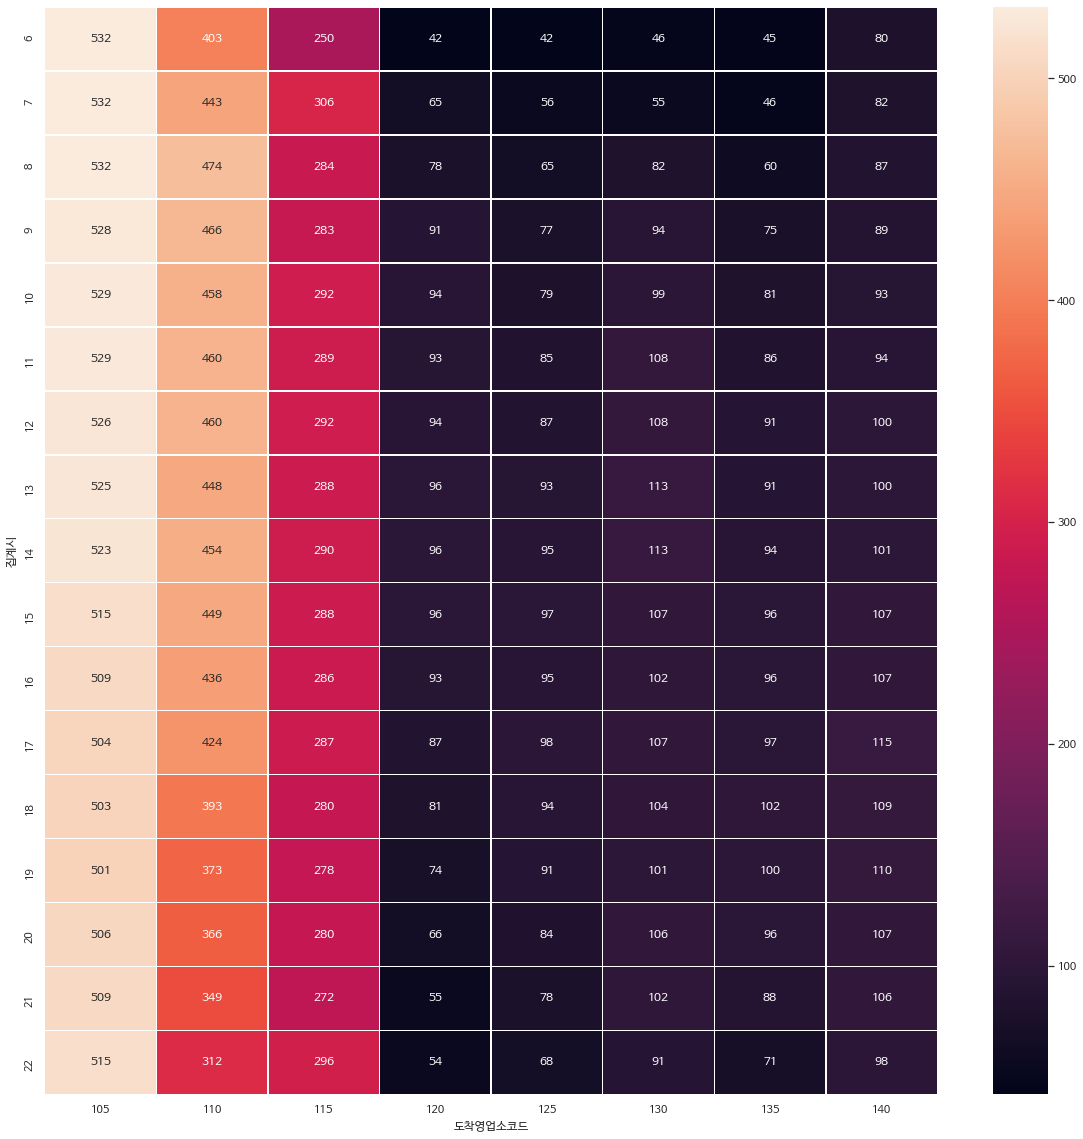

In [ ]:
# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(data_06_22_time, annot=True, fmt="d", linewidths=.5, ax=ax)

#6. 요일

In [ ]:
data_06_22_weekdays = data_06_22.groupby('요일')['도착영업소코드'].value_counts().unstack().fillna(0)

In [ ]:
data_06_22_weekdays

도착영업소코드,105,110,115,120,125,130,135,140
요일,,,,,,,,
0,1301,1121,713,199,216,288,200,249
1,1293,1112,687,155,188,211,186,226
2,1303,1111,694,193,198,208,183,235
3,1300,1114,689,192,206,214,218,237
4,1280,1017,731,203,203,249,200,262
5,1203,870,689,228,192,195,238,243
6,1138,823,638,185,181,273,190,233


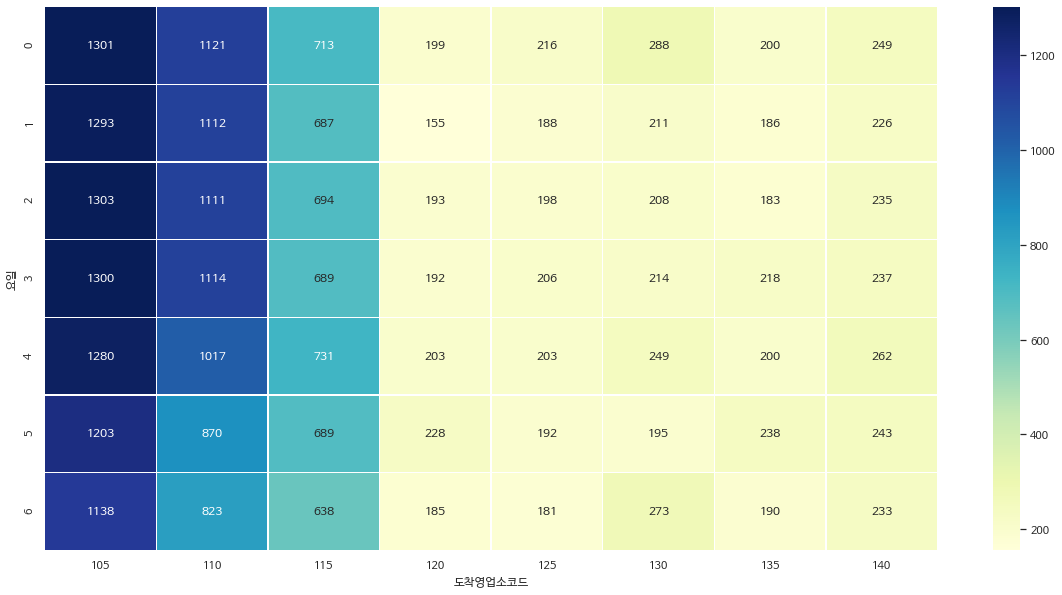

In [ ]:
# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(data_06_22_weekdays, annot=True, fmt="d", linewidths=.5, ax=ax, cmap="YlGnBu")